In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns


Importing dataset

In [25]:

data=pd.read_csv('children anemia.csv')


DATA CLEANING AND PREPROCESSING

In [26]:
#Display top rows of the dataset
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [27]:
#Describe dataset
data.describe()

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
count,33924.000000,33924.000000,13136.000000,10182.000000
mean,1.823783,19.570776,114.367235,101.270183
std,0.705460,4.313172,15.915408,15.569583
min,1.000000,12.000000,20.000000,29.000000
25%,1.000000,16.000000,105.000000,92.000000
50%,2.000000,19.000000,115.000000,103.000000
75%,2.000000,22.000000,125.000000,112.000000
max,6.000000,48.000000,218.000000,170.000000


In [28]:
#print the data types of all columns
data.dtypes

Age in 5-year groups                                                      object
Type of place of residence                                                object
Highest educational level                                                 object
Wealth index combined                                                     object
Births in last five years                                                  int64
Age of respondent at 1st birth                                             int64
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    float64
Anemia level                                                              object
Have mosquito bed net for sleeping (from household questionnaire)         object
Smokes cigarettes                                                         object
Current marital status                                                    object
Currently residing with husband/partner                                   object
When child put to breast    

In [29]:
#Find the number of null values in each column
data.isnull().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

Handling null values

In [30]:
#replacing null values of integer columns with mean
data_new_1= data['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(data['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].mean())
data_new_2=data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].mean())

In [31]:
data['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)']=data_new_1
data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)']=data_new_2

In [32]:
#replace null values in the column 'Had fever in last two weeks' with unknown
data['Had fever in last two weeks']=data['Had fever in last two weeks'].fillna('unknown')

In [33]:
data.isnull().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)        0
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

In [34]:
#Drop all the duplicates
data=data.drop_duplicates()

In [35]:


#replacing null values for anemia level as it is the target variable
data.dropna(subset=['Anemia level','Taking iron pills, sprinkles or syrup'],inplace=True)

In [36]:
data.isnull().sum()

Age in 5-year groups                                                        0
Type of place of residence                                                  0
Highest educational level                                                   0
Wealth index combined                                                       0
Births in last five years                                                   0
Age of respondent at 1st birth                                              0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)       0
Anemia level                                                                0
Have mosquito bed net for sleeping (from household questionnaire)           0
Smokes cigarettes                                                           0
Current marital status                                                      0
Currently residing with husband/partner                                   656
When child put to breast                                        

In [37]:
data.shape

(11906, 17)

In [38]:
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
5,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,NaN,No,119.0,Not anemic,No
6,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,102.0,Mild,Yes
9,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Not anemic,Yes
12,25-29,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Married,Living with her,Days: 1,No,109.0,Mild,No


Finding unique values

In [39]:
data['Current marital status'].unique()


array(['Married', 'Never in union', 'No longer living together/separated',
       'Widowed', 'Living with partner', 'Divorced'], dtype=object)

In [40]:
data['Smokes cigarettes'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
data['Smokes cigarettes'].value_counts()

Smokes cigarettes
No     11878
Yes       28
Name: count, dtype: int64

In [42]:
data['Current marital status'].value_counts()

Current marital status
Married                                10825
Living with partner                      425
Never in union                           265
Widowed                                  158
No longer living together/separated      129
Divorced                                 104
Name: count, dtype: int64

In [43]:
print(data['Have mosquito bed net for sleeping (from household questionnaire)'].unique())
print(data['Smokes cigarettes'].unique())
print(data['Taking iron pills, sprinkles or syrup'].unique())
print(data['Anemia level'].unique())
print(data['Current marital status'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes' "Don't know"]
['Moderate' 'Mild' 'Not anemic' 'Severe']
['Married' 'Never in union' 'No longer living together/separated'
 'Widowed' 'Living with partner' 'Divorced']


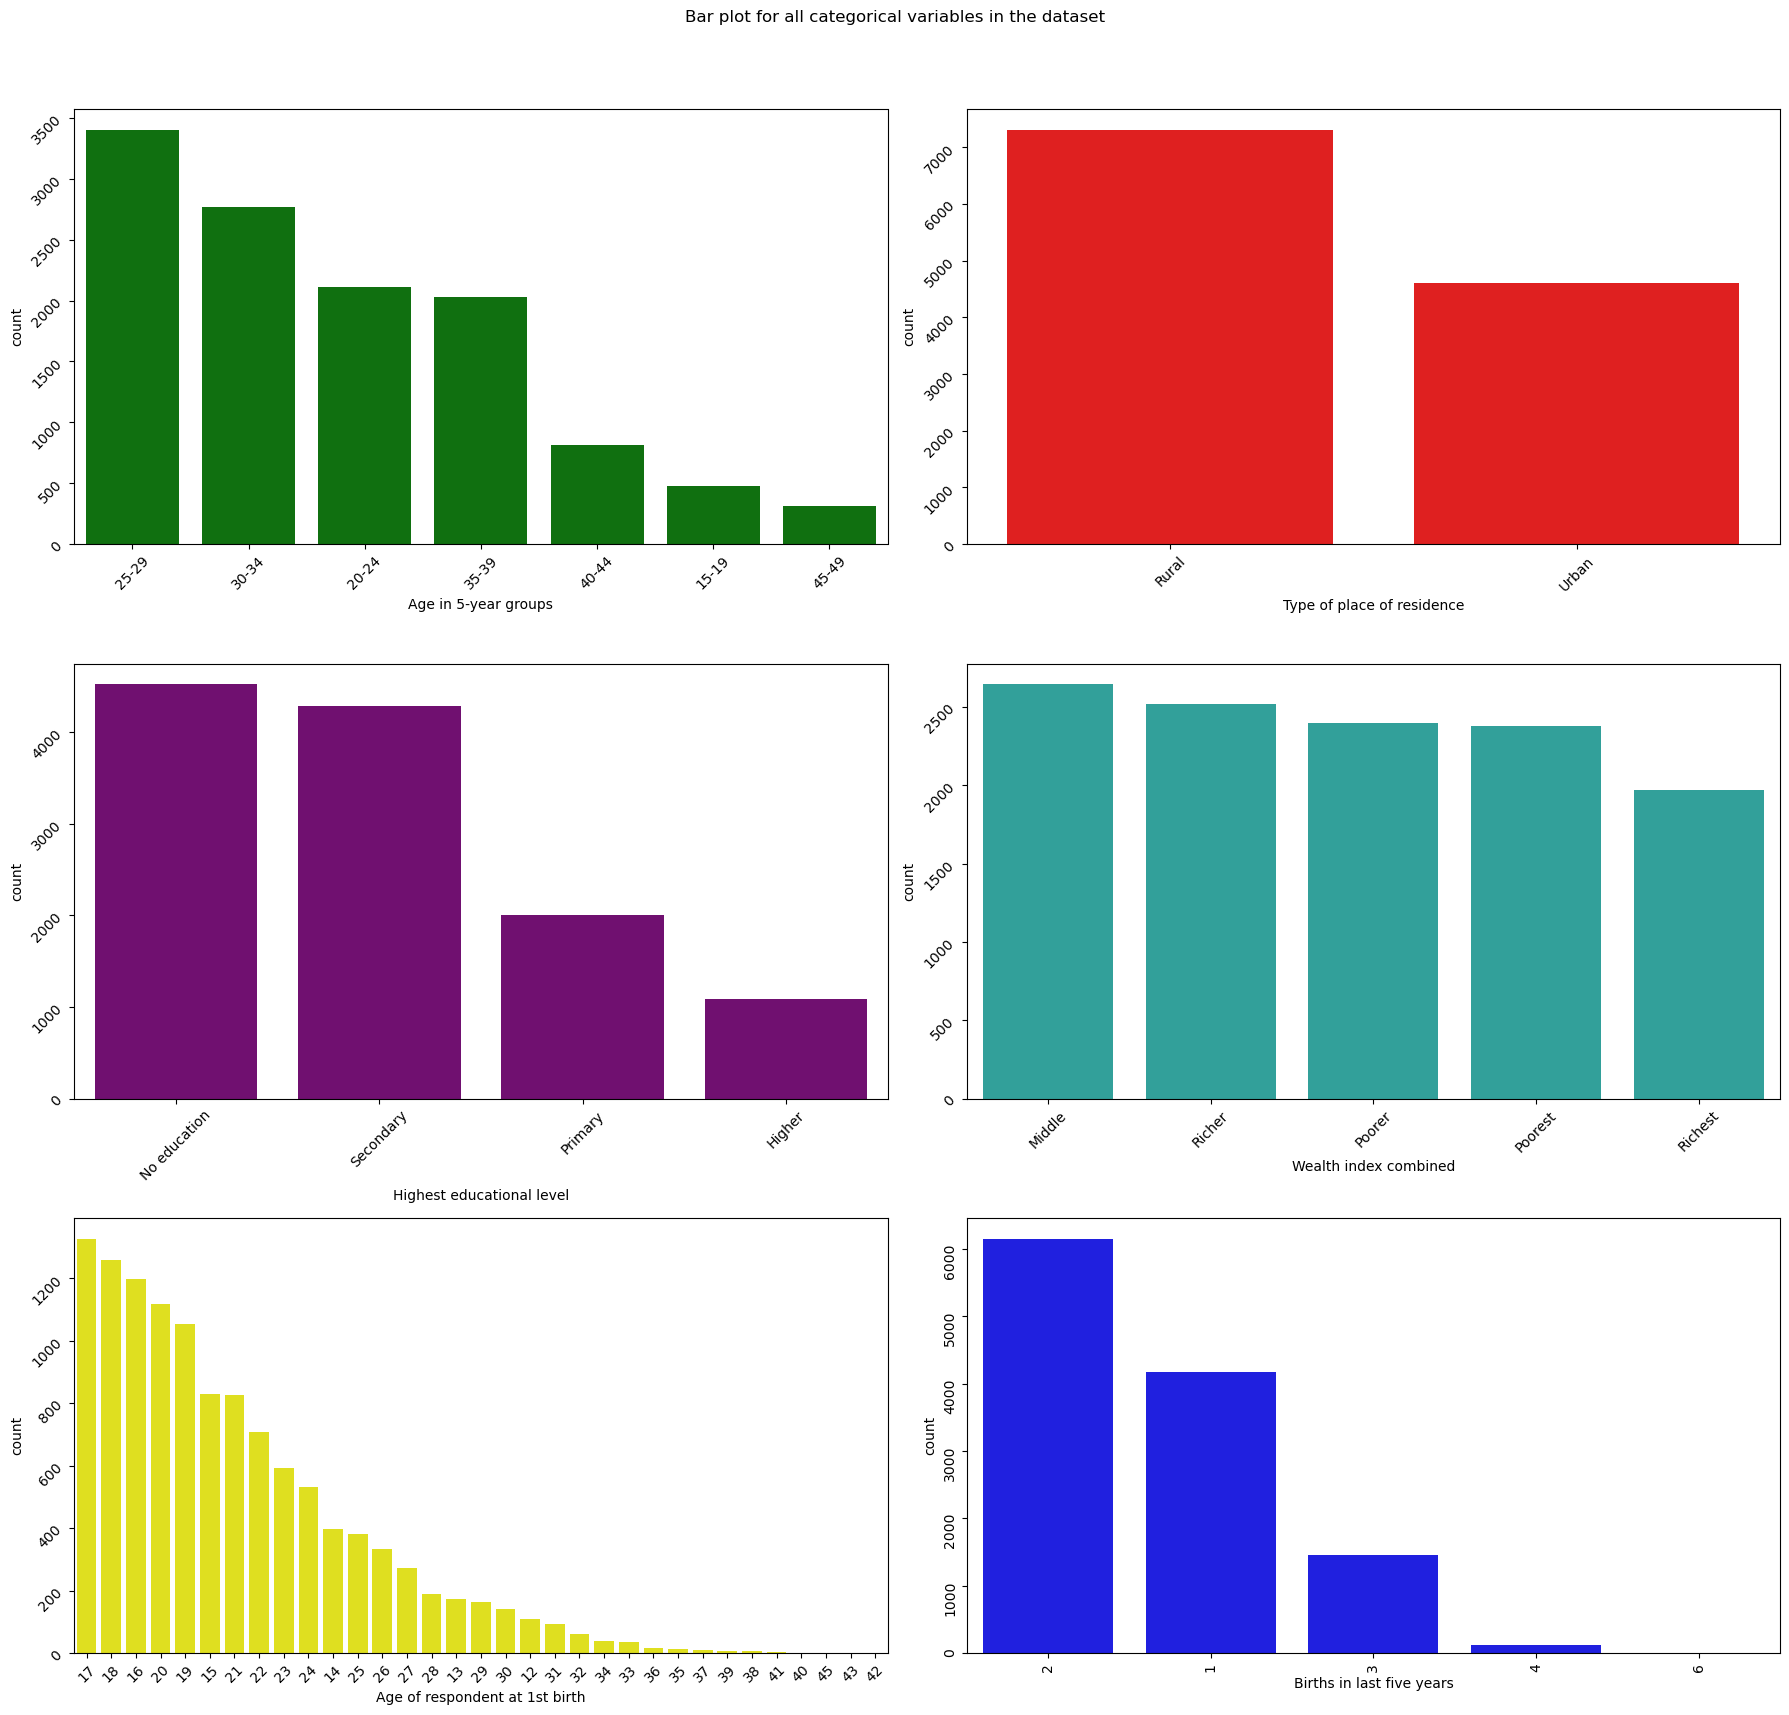

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')

# List of categorical columns to iterate through
categorical_columns = ['Age in 5-year groups', 'Type of place of residence', 'Highest educational level',
                        'Wealth index combined', 'Age of respondent at 1st birth', 'Births in last five years']

# list of colors for each plot
colors = ['green', 'red', 'purple', 'lightseagreen', 'yellow', 'blue']

# Iterate through columns and colors to create subplots
for col, color, ax in zip(categorical_columns, colors, axes.flatten()):
    sns.countplot(x=col, data=data, color=color, order=data[col].value_counts().index, ax=ax)
    ax.tick_params(labelrotation=45 if 'Births' not in col else 90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


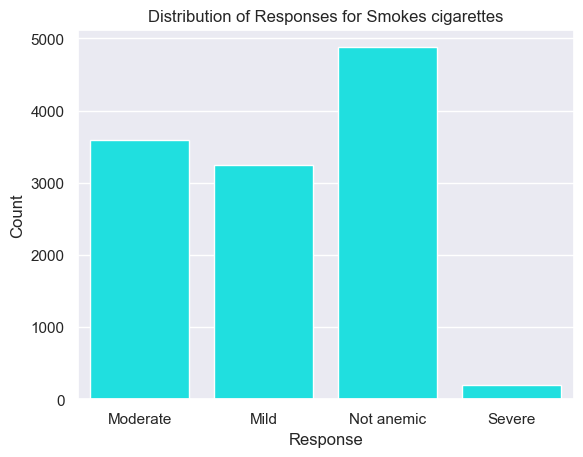

In [98]:
# Using seaborn countplot
sns.countplot(x='Anemia level', color='cyan',data=data)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Anemia levels distribution')
plt.show()

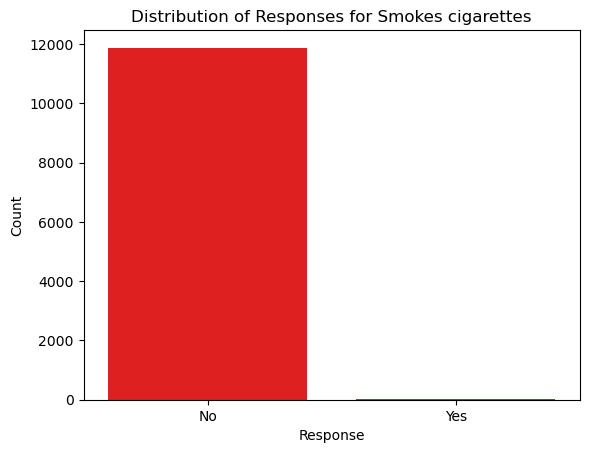

In [45]:
# Using seaborn countplot
sns.countplot(x='Smokes cigarettes', color='red',data=data)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses for Smokes cigarettes')
plt.show()

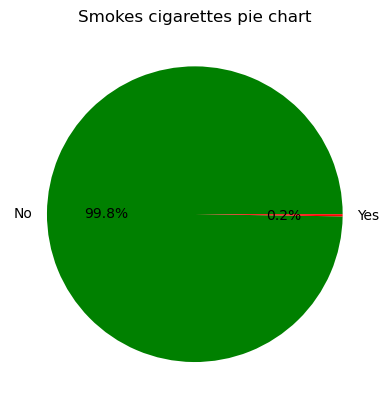

In [46]:
# Plotting the Smokes cigarettes distributions as a pie chart
response_counts = data['Smokes cigarettes'].value_counts()
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Smokes cigarettes pie chart')
plt.show()

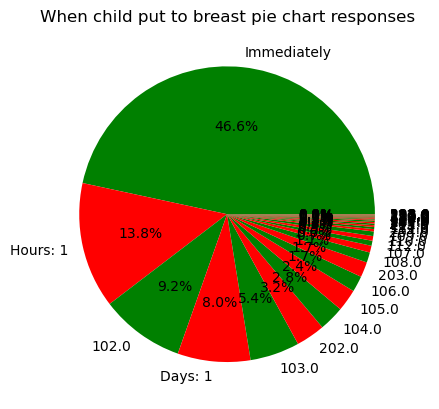

In [47]:
# Plotting the  When child put to breast distributions as a pie chart
response_counts = data['When child put to breast'].value_counts()
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('When child put to breast pie chart responses')
plt.show()

In [48]:
colb=data['Anemia level']
def show_plots(cola,colb,title):
    sns.set(style='darkgrid')

    #check if cola is numerical or categorical
    #categorical
    if cola.dtypes=='0':
        plt.figure(figsize=(20,6))
        sns.scatterplot(x=cola,y=colb)
        plt.title(title)
        plt.xlabel(cola.name)
        plt.ylabel(colb.name)
        
    #numerical
    else:
        
        plt.figure(figsize=(8,6))
        sns.countplot(x=cola,hue=colb,palette="tab10")
        plt.title(title)
        plt.xlabel(cola.name)
        plt.ylabel('Count')

    plt.show()
    


Plot of Relationship between anemia level and place of residence

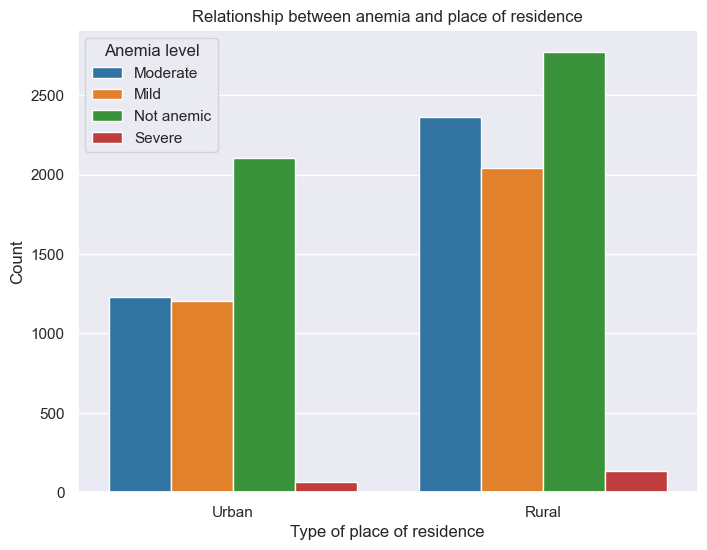

In [49]:
show_plots(data['Type of place of residence'],colb,'Relationship between anemia and place of residence')

Replace marital status category names with shorter ones

In [50]:
['Married' 'Never in union' 'No longer living together/separated'
 'Widowed' 'Living with partner' 'Divorced']
map_names={'Married':'Married','Never in union':'No union','No longer living together/separated':'separated',
           'Widowed':'Widowed','Living with partner':'Living together','Divorced':'Divorced'}
data_new=data['Current marital status'].replace(map_names)


Plot of Relationship between anemia level and current marital status

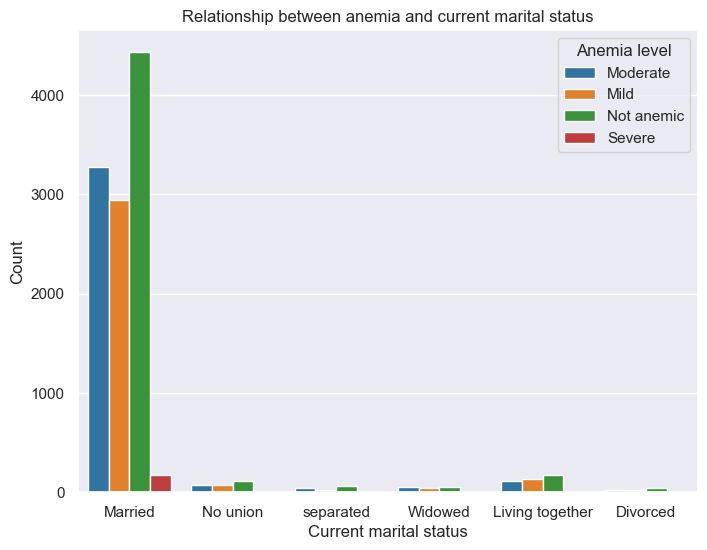

In [51]:

show_plots(data_new,colb,'Relationship between anemia and current marital status')

Plot of Relationship between anemia level and whether Currently residing with husband/partner

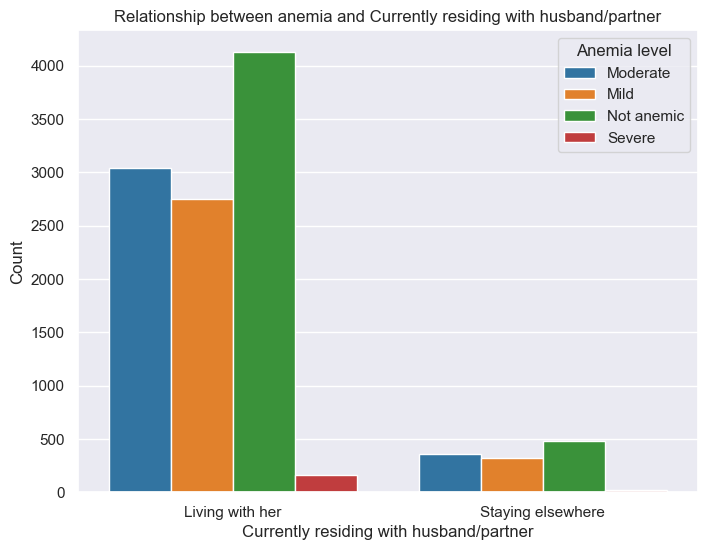

In [52]:
show_plots(data['Currently residing with husband/partner'],colb,'Relationship between anemia and Currently residing with husband/partner')

In [53]:
#drop anemia level.1 column as another anemial level column exists 

#drop Currently residing with husband/partner as there is a similar column 'Current marital status'
data.drop(['Anemia level.1','Currently residing with husband/partner','When child put to breast'],inplace=True,axis=1)

SPLIT DATASET INTO TRAIN AND TEST

In [54]:
x=data.drop(columns=['Anemia level']).values
y=data['Anemia level'].values

In [55]:
print(x)
print(y)

[['25-29' 'Urban' 'Secondary' ... 'No' 114.0 'No']
 ['30-34' 'Urban' 'Higher' ... 'No' 119.0 'No']
 ['35-39' 'Urban' 'Secondary' ... 'No' 102.0 'Yes']
 ...
 ['25-29' 'Rural' 'No education' ... 'No' 120.0 'No']
 ['25-29' 'Rural' 'Higher' ... 'No' 119.0 'No']
 ['20-24' 'Rural' 'Secondary' ... 'No' 75.0 'Yes']]
['Moderate' 'Mild' 'Not anemic' ... 'Not anemic' 'Not anemic' 'Not anemic']


In [56]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)  


In [57]:
print(x_train)

[['30-34' 'Urban' 'Secondary' ... 'No' 104.0 'No']
 ['35-39' 'Urban' 'No education' ... 'No' 108.0 'No']
 ['30-34' 'Urban' 'Higher' ... 'No' 111.0 'Yes']
 ...
 ['35-39' 'Rural' 'Secondary' ... 'Yes' 101.0 'No']
 ['35-39' 'Urban' 'Secondary' ... 'No' 101.27018267530937 'No']
 ['20-24' 'Rural' 'No education' ... 'Yes' 56.0 'No']]


In [58]:
print(x_test[10])

['30-34' 'Rural' 'Primary' 'Poorest' 2 16 109.0 'Yes' 'No' 'Married' 'No'
 105.0 'No']


In [59]:
print(y_train)

['Moderate' 'Not anemic' 'Moderate' ... 'Moderate' 'Mild' 'Moderate']


In [60]:
print(type(x))

<class 'numpy.ndarray'>


In [61]:
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,No,114.0,No
5,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,No,119.0,No
6,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,No,102.0,Yes
9,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,No,113.0,Yes
12,25-29,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Married,No,109.0,No


DATA ENCODING

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Apply one hot encoding 
enc=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[0,1,2,3,7,8,9,10,12])],remainder="passthrough")
x_train=np.array(enc.fit_transform(x_train))
x_test=np.array(enc.transform(x_test))

In [63]:
#Encoding the independent variable
from sklearn.preprocessing import LabelEncoder
ind=LabelEncoder()
y_train=ind.fit_transform(y_train)
y_test=ind.fit_transform(y_test)

Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_test=scal.fit_transform(x_test)

DATA BALANCING

In [65]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [66]:
#oversampling and undersampling
sampling_over=SMOTE(sampling_strategy="auto")
sampling_under=RandomUnderSampler(sampling_strategy="auto")
#create pipeline
combined=[("oversample",sampling_over),("undersample",sampling_under)]
pipe= Pipeline (steps=combined)
#Resample the data
x_train_s,y_train_s=pipe.fit_resample(x_train,y_train)

RandomizedSearch

Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression(multi_class='multinomial',random_state=0,max_iter=1000)
lg.fit(x_train_s,y_train_s)


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

Accuracy score of model

In [91]:
from sklearn.metrics import accuracy_score
l_y_pred = lg.predict(x_test)
accuracy_score(y_test, l_y_pred)

0.8921074727120067

RandomForest Classifier

RandomizedSearch to find best hyper-parameters

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
paramm={
        'n_estimators':[int(x) for x in(np.linspace(start=10,stop=200,num=20))],
        'max_features':['sqrt','log2'],
        'max_depth':[int(x) for x in np.linspace(start=2,stop=20,num=10)],
        'criterion':['gini','entropy'],
        'random_state':[0]


}

rsc=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=paramm,n_iter=50,scoring='accuracy',cv=10,n_jobs=-1)
rsc.fit(x_train_s,y_train_s)

accu=rsc.best_score_
b_param=rsc.best_params_

print("Best Parameters are: " , b_param)
print("The best accuracy is: ",accu)


Best Parameters are:  {'random_state': 0, 'n_estimators': 70, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
The best accuracy is:  0.9603902373066932


Fitting of the model

In [70]:
model= RandomForestClassifier(criterion='entropy', max_depth = 20, max_features='sqrt', n_estimators= 70, random_state=0)
model.fit(x_train_s,y_train_s)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=70,
                       random_state=0)

Accuracy score of model

In [71]:
from sklearn.metrics import accuracy_score
predict_y = model.predict(x_test)
accuracy_score(y_test, predict_y)

0.9290512174643157

Evaluation of the model using confusion matrix

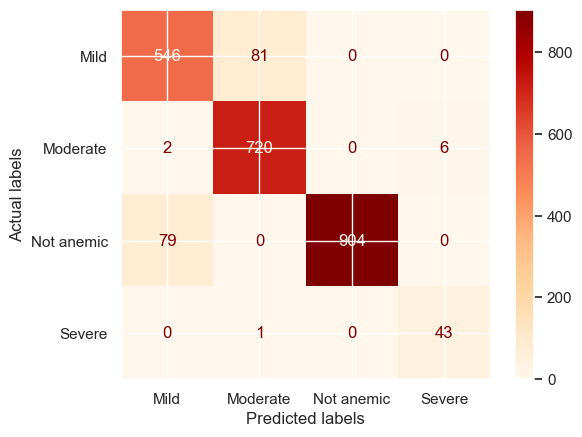

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#class names
cl_names=['Mild' ,'Moderate', 'Not anemic', 'Severe']
# Predict the X_test

# Create the confusion matrix
cfm = confusion_matrix(y_test, predict_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm ,display_labels=cl_names)
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()



ANN MODEL

In [73]:

import tensorflow as tf


In [74]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [75]:
# One-hot encode the labels
one_y = to_categorical(y_train_s, num_classes=4)



# Architecture of model
model = Sequential()
model.add(Dense(64, input_dim=x_train_s.shape[1], activation='relu'))
model.add(Dense(4, activation='softmax'))  # Set the number of classes here

# Model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting of the model
els = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history = model.fit(x_train_s, one_y, batch_size=64, epochs=100, validation_split=0.2, callbacks=[els])

c:\Users\aisha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4289 - loss: 1.2566 - val_accuracy: 0.0565 - val_loss: 1.3163
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7393 - loss: 0.7374 - val_accuracy: 0.7705 - val_loss: 0.5743
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8611 - loss: 0.5096 - val_accuracy: 0.9028 - val_loss: 0.3839
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8886 - loss: 0.3954 - val_accuracy: 0.9470 - val_loss: 0.2697
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8969 - loss: 0.3419 - val_accuracy: 0.9531 - val_loss: 0.2368
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9081 - loss: 0.3047 - val_accuracy: 0.9676 - val_loss: 0.1828
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9105 - loss: 0.2889 - val_accuracy: 0.9849 - val_loss: 0.1345
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9085 - loss: 0.2783 - val_acc

In [92]:

from keras.utils import to_categorical


# Converting to one-hot encoded format
y_test_one_hot = to_categorical(y_test, num_classes=4)

# Evaluation of model
mod_eval=model.evaluate(x_test, y_test_one_hot)



75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9106 - loss: 0.2760


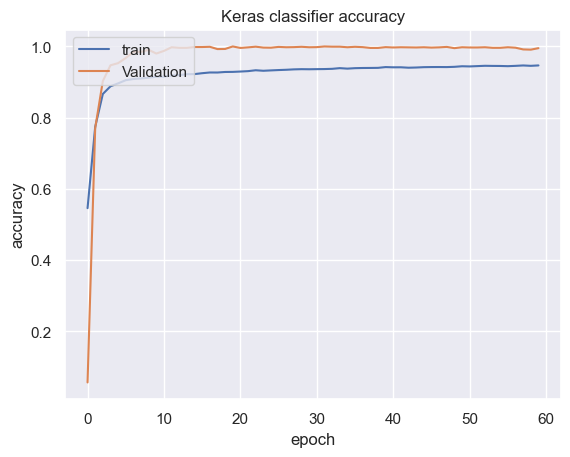

In [77]:
#Visualizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Keras classifier accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

plt.show()

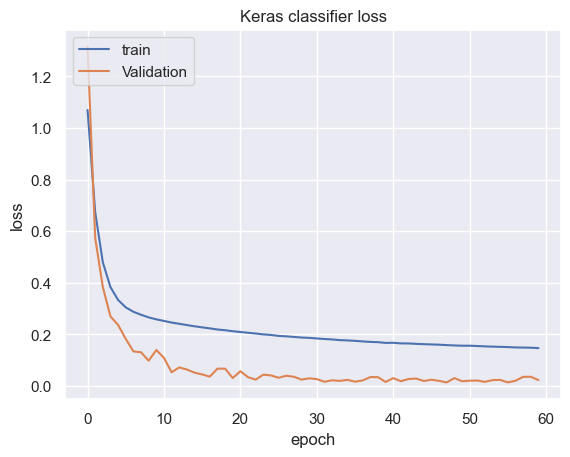

In [78]:
# Visualizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Keras classifier loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

SVM 

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

GRIDSEARCH FOR BEST HYPERPARAMETER

In [80]:
prm_grid=[{
        'C':[1,10,100,1000],
        'kernel':['rbf'],
        'gamma':[1e-3,1e-4]}

]

In [81]:
model_svm=GridSearchCV(SVC(),param_grid=prm_grid,cv=5)
model_svm.fit(x_train_s,y_train_s)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [82]:
print(model_svm.best_params_)
print(model_svm.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [84]:
mdl=SVC(kernel= 'rbf',C= 1000, gamma=0.0001 )
mdl.fit(x_train_s,y_train_s)

SVC(C=1000, gamma=0.0001)

In [85]:
from sklearn.metrics import accuracy_score
y_pred=mdl.predict(x_test)
accuracy_score(y_test,y_pred)

0.9047019311502938

Classification report

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       627
           1       0.89      0.91      0.90       728
           2       0.99      0.93      0.96       983
           3       0.84      0.95      0.89        44

    accuracy                           0.90      2382
   macro avg       0.88      0.91      0.90      2382
weighted avg       0.91      0.90      0.91      2382



Confusion matrix

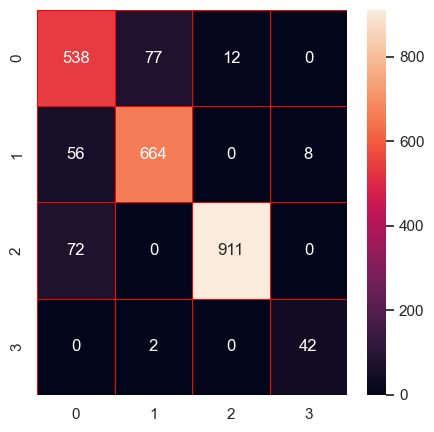

In [87]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5 ,linecolor ="red",fmt =".0f",ax=ax)
plt.show()

Model Comparison using bar plot

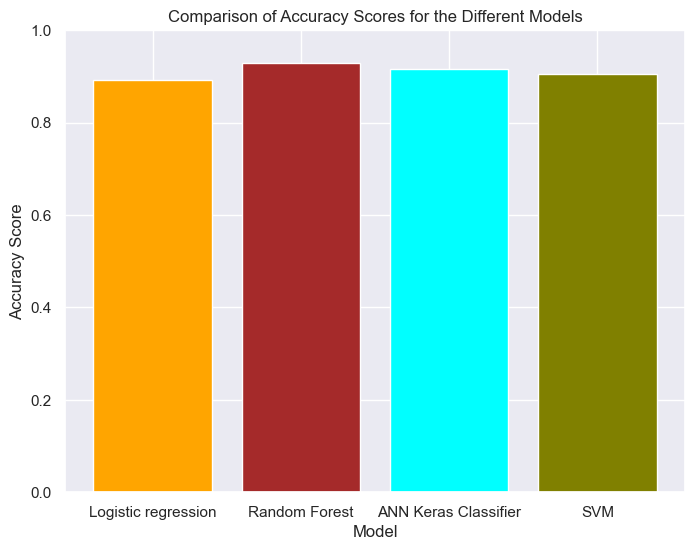

In [90]:
import matplotlib.pyplot as plt

# List of Model names and accuracy scores
model_names = ['Logistic regression', 'Random Forest', 'ANN Keras Classifier','SVM']
accuracy_scores = [0.892, 0.929, 0.917,0.905]

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['orange', 'brown', 'cyan','olive'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for the Different Models')
plt.ylim(0, 1)  # Set the y-axis range to 0-1 for accuracy scores
plt.show()
